In [53]:
import numpy
import matplotlib.pyplot as plt 
from matplotlib import cm
import pandas
import mglearn
import os
import scipy

import sklearn
import sklearn.ensemble              # import seperatley otherwise sub module won't be imported
import sklearn.neural_network        # import seperatley otherwise sub module won't be imported
from sklearn.cluster import KMeans
import sklearn.feature_selection

import graphviz
import mpl_toolkits.mplot3d as plt3dd

In [56]:
iris = sklearn.datasets.load_iris();

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(iris.data, iris.target, random_state=0);

In [78]:
gamma = numpy.logspace(-5,1, 20);
C =  numpy.linspace(0.0000000001,10, 150);

XX, YY = numpy.meshgrid(gamma, C);
ZZ = numpy.zeros(XX.shape);


for g_i in range(0, len(gamma)):
    for c_ii in range(0, len(C)):
        model = sklearn.svm.SVC(C= C[c_ii], gamma=gamma[g_i]);
        model.fit(X_train, y_train);
        
        ZZ[c_ii, g_i] = model.score(X_test, y_test)*100;

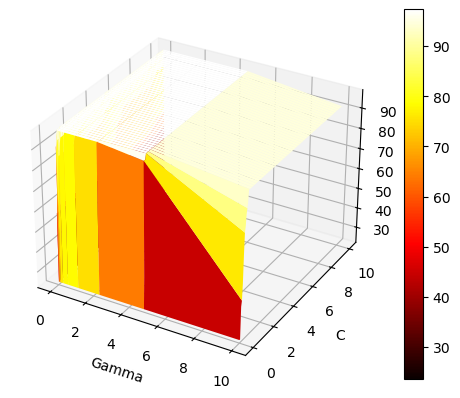

In [79]:
Fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
a = ax.plot_surface(XX, YY, ZZ, cmap=cm.hot);
ax.set_xlabel("Gamma");
ax.set_ylabel("C");
ax.set_zlabel("Score (%)");
Fig.colorbar(a);

## Simple grid search

In [72]:
iris = sklearn.datasets.load_iris();

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(iris.data, iris.target, random_state=0);

print("Size of training set: {} size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

Size of training set: 112 size of test set: 38


In [76]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = sklearn.svm.SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma};

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


## The Danger of Overfitting the Parameters and the Validation Set

Given this result, we might be tempted to report that we found a model that performs with 97% accuracy on our dataset. However, this claim could be overly optimistic (orjust wrong), for the following reason: we tried many different parameters and selected the one with best accuracy on the test set, but this accuracy won’t necessarily carry over to new data. Because we used the test data to adjust the parameters, we can no longer use it to assess how good the model is. This is the same reason we needed to split the data into training and test sets in the first place; we need an independent dataset to evaluate, one that was not used to create the model.



One way to resolve this problem is to split the data again, so we have three sets: the training set to build the model, the validation (or development) set to select the parameters of the model, and the test set to evaluate the performance of the selected parameters.

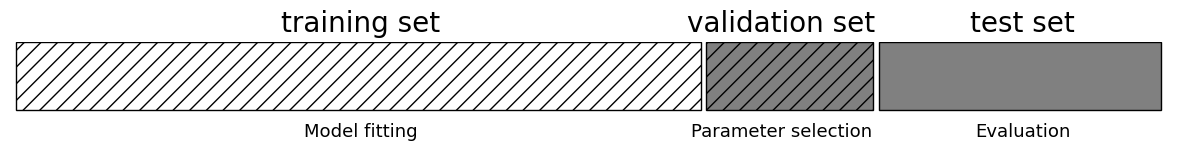

In [81]:
mglearn.plots.plot_threefold_split()

In [84]:
X_trainval, X_test, y_trainval, y_test = sklearn.model_selection.train_test_split(iris.data, iris.target, random_state=0);

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X_trainval, y_trainval, random_state=1);

print("Size of training set: {} size of validation set: {} size of test set:"
" {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]));

Size of training set: 84 size of validation set: 28 size of test set: 38



In [85]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = sklearn.svm.SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma};

In [89]:
svc = sklearn.svm.SVC(**best_parameters);
svc.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test);


print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.97
Best parameters:  {'C': 100, 'gamma': 0.001}
Test set score with best parameters: 0.45
